In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [3]:
mk=pd.read_csv(r"C:\Users\ADMIN00\Downloads\Malignant-Comments-Classifier-Project--1-\train.csv")
mk.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
mk.drop(["id","highly_malignant","rude","threat","abuse","loathe"],axis=1,inplace=True)

In [5]:
mk.head()

,comment_text,malignant
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
mk.shape

(159571, 2)

In [7]:
mj=pd.read_csv(r"C:\Users\ADMIN00\Downloads\Malignant-Comments-Classifier-Project--1-\test.csv")
mj.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
mj.drop(["id"],axis=1,inplace=True)

In [9]:
mj.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [10]:
mj.shape

(153164, 1)

In [11]:
mg=pd.concat([mk,mj],axis=0)

In [12]:
mg

,comment_text,malignant
0,Explanation\nWhy the edits made under my usern...,0.0
1,D'aww! He matches this background colour I'm s...,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0
4,"You, sir, are my hero. Any chance you remember...",0.0
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",NaN
153160,== Throw from out field to home plate. == \n\n...,NaN
153161,""" \n\n == Okinotorishima categories == \n\n I ...",NaN
153162,""" \n\n == """"One of the founding nations of the...",NaN


In [13]:
mg.shape

(312735, 2)

In [14]:
mg.dtypes

comment_text     object
malignant       float64
dtype: object

In [15]:
mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312735 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   comment_text  312735 non-null  object 
 1   malignant     159571 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.2+ MB


In [16]:
mg.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            153154, 153155, 153156, 153157, 153158, 153159, 153160, 153161,
            153162, 153163],
           dtype='int64', length=312735)

In [17]:
mg.columns

Index(['comment_text', 'malignant'], dtype='object')

In [18]:
mg["malignant"].value_counts()

0.0    144277
1.0     15294
Name: malignant, dtype: int64

In [19]:
mg.nunique()

comment_text    312735
malignant            2
dtype: int64

0.0    144277
1.0     15294
Name: malignant, dtype: int64


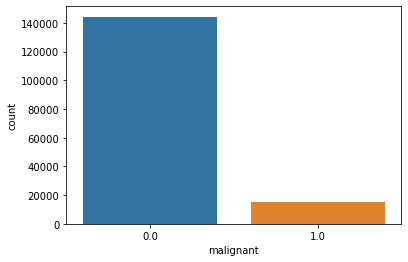

In [20]:
sns.countplot(x='malignant',data=mg)
print(mg['malignant'].value_counts())

In [21]:
mg.isnull().sum()

comment_text         0
malignant       153164
dtype: int64

<AxesSubplot:>

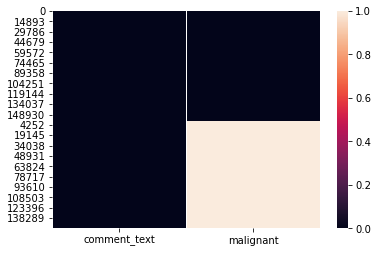

In [22]:
sns.heatmap(mg.isnull())

In [23]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
mg['malignant']=imp.fit_transform(mg['malignant'].values.reshape(-1,1))

In [24]:
mg['malignant']

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
153159    0.095844
153160    0.095844
153161    0.095844
153162    0.095844
153163    0.095844
Name: malignant, Length: 312735, dtype: float64

In [25]:
mg.head()

,comment_text,malignant
0,Explanation\nWhy the edits made under my usern...,0.0
1,D'aww! He matches this background colour I'm s...,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0
4,"You, sir, are my hero. Any chance you remember...",0.0


<AxesSubplot:>

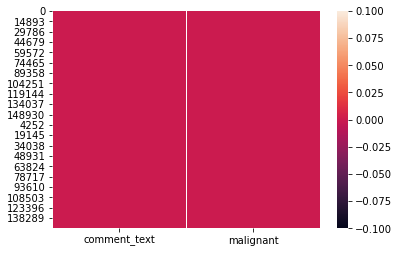

In [26]:
sns.heatmap(mg.isnull())

In [27]:
mg['malignant'] =mg['malignant'].astype(int)                               # apply(int)

In [28]:
mg['malignant']

0         0
1         0
2         0
3         0
4         0
         ..
153159    0
153160    0
153161    0
153162    0
153163    0
Name: malignant, Length: 312735, dtype: int32

In [29]:
mg['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
153159    . \n i totally agree, this stuff is nothing bu...
153160    == Throw from out field to home plate. == \n\n...
153161    " \n\n == Okinotorishima categories == \n\n I ...
153162    " \n\n == ""One of the founding nations of the...
153163    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 312735, dtype: object

In [30]:
mg['comment_text'][500]

500    Protecting 'Causes of the 1948 Palestinian exo...
500    " \n\n == ""Tomb of the unknown rapist"" == \n...
Name: comment_text, dtype: object

In [31]:
mg.shape

(312735, 2)

In [32]:
mg["length"]=mg.comment_text.str.len()
mg.head()

,comment_text,malignant,length
0,Explanation\nWhy the edits made under my usern...,0,264
1,D'aww! He matches this background colour I'm s...,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,622
4,"You, sir, are my hero. Any chance you remember...",0,67


In [33]:
mg['comment_text']=mg['comment_text'].str.lower()

In [34]:
# remove email address
mg['comment_text']=mg['comment_text'].str.replace(r"^.+@[^\.].*\.[a-z]{2,}$",
                                               'emailaddress')
# remove web address
mg['comment_text']=mg['comment_text'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                               'webaddress')
# remove money symbol
mg['comment_text']=mg['comment_text'].str.replace(r"£|\$",'dollers')

# remove rupees symbol
mg['comment_text']=mg['comment_text'].str.replace(r"\₹",'rupees')

# remove 10 digit phone number
mg['comment_text']=mg['comment_text'].str.replace(r"^\(?[\d]{3}\)?[\s-]?[\d]{3}?[\s-]?[\d]{4}$",
                                               'phonenumber')
# remove the any number
mg['comment_text']=mg['comment_text'].str.replace(r"\d+(\.\d+)?",'number')

# remove any punctuation
mg['comment_text']=mg['comment_text'].str.replace("[^\w\d\s]",' ')

# replace whitespace between with a single space
mg['comment_text']=mg['comment_text'].str.replace(r"\s+",' ')

# replace leading and trailing whitespace
mg['comment_text']=mg['comment_text'].str.replace(r"^\s+|\s+?$",'')

In [36]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english") + ['u','ur','4','2','doin','dont','ure','i','m','d','can t'])

mg['comment_text']=mg['comment_text'].apply(lambda x: ' '.join(
                                          p for p in x.split() if p not in stop_words))

In [37]:
mg["clean_length"]=mg.comment_text.str.len()
mg.head()

,comment_text,malignant,length,clean_length
0,explanation edits made username hardcore metal...,0,264,172
1,aww matches background colour seemingly stuck ...,0,112,97
2,hey man really trying edit war guy constantly ...,0,233,141
3,make real suggestions improvement wondered sec...,0,622,374
4,sir hero chance remember page,0,67,29


In [38]:
print('original length',mg.length.sum())
print('clean length',mg.clean_length.sum())

original length 118778863
clean length 76870214


In [40]:
from wordcloud import WordCloud

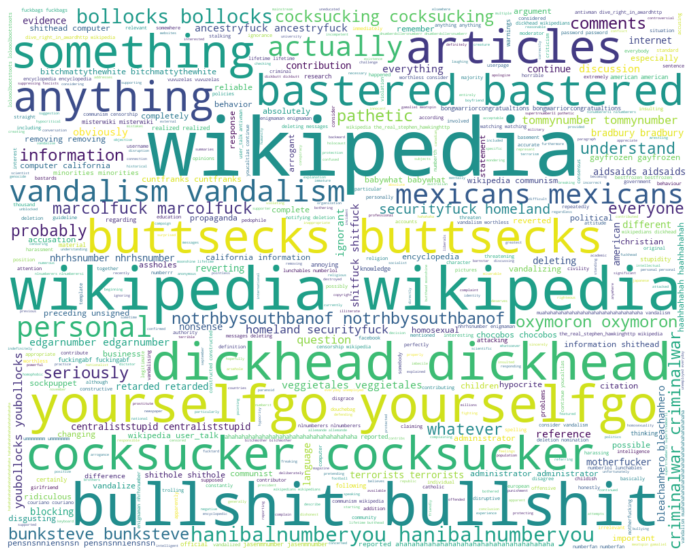

In [41]:
plt.figure(figsize=(14,10))
wc=WordCloud(max_words=500,width=1000,height=800,min_word_length=8,
             background_color='white').generate(" ".join(mg[mg.malignant == 1].comment_text))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

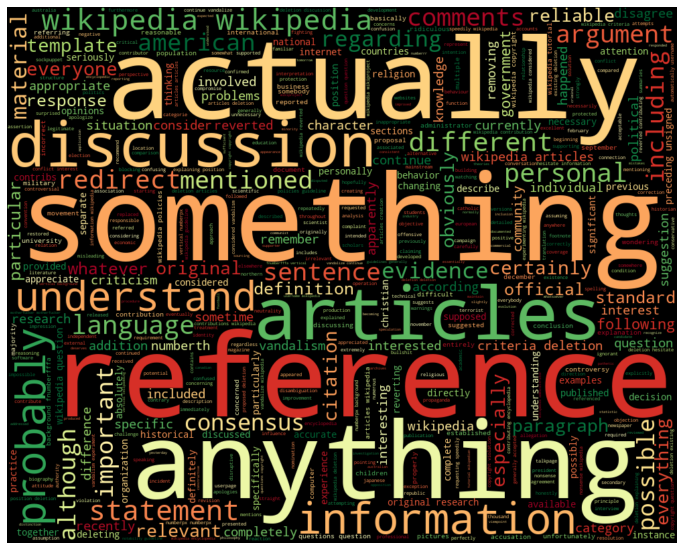

In [42]:
plt.figure(figsize=(12,10))
wc=WordCloud(max_words=500,width=1000,height=800,min_word_length=8,
             colormap='RdYlGn').generate(" ".join(mg[mg.malignant == 0].comment_text))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

In [45]:
empty=[]
for l in mg["comment_text"]:
    vs=sia.polarity_scores(l)
    empty.append(vs)

mg_senti=pd.DataFrame(empty)
mg_senti.head()

,neg,neu,pos,compound
0,0.000,0.745,0.255,0.6369
1,0.110,0.442,0.448,0.4767
2,0.158,0.721,0.121,-0.2415
3,0.082,0.801,0.117,0.2500
4,0.000,0.349,0.651,0.6808


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tdi=TfidfVectorizer()
pt=tdi.fit_transform(mg["comment_text"])

In [48]:
tdi.vocabulary_

{'explanation': 87244,
 'edits': 77922,
 'made': 157633,
 'username': 282607,
 'hardcore': 112179,
 'metallica': 166178,
 'fan': 89186,
 'reverted': 226762,
 'vandalisms': 284168,
 'closure': 48917,
 'gas': 100471,
 'voted': 288951,
 'new': 180375,
 'york': 301304,
 'dolls': 72599,
 'fac': 88118,
 'please': 206298,
 'remove': 224439,
 'template': 264891,
 'talk': 262377,
 'page': 197164,
 'since': 244898,
 'retired': 226381,
 'number': 185277,
 'aww': 20711,
 'matches': 161932,
 'background': 21598,
 'colour': 50624,
 'seemingly': 238557,
 'stuck': 256204,
 'thanks': 266411,
 'january': 132944,
 'utc': 282943,
 'hey': 115651,
 'man': 159421,
 'really': 221052,
 'trying': 274748,
 'edit': 77753,
 'war': 290521,
 'guy': 109684,
 'constantly': 53739,
 'removing': 224459,
 'relevant': 223993,
 'information': 126702,
 'talking': 262435,
 'instead': 127843,
 'seems': 238560,
 'care': 40686,
 'formatting': 95395,
 'actual': 3280,
 'info': 126573,
 'make': 158711,
 'real': 220940,
 'suggestion

In [49]:
mg["comment_text"]

0         explanation edits made username hardcore metal...
1         aww matches background colour seemingly stuck ...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima categories see changes agree co...
153162    one founding nations eu germany law return qui...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 312735, dtype: object

In [50]:
pt

<312735x336594 sparse matrix of type '<class 'numpy.float64'>'
	with 8220621 stored elements in Compressed Sparse Row format>

In [51]:
x=pt[0:159572].copy()

In [52]:
prt=pt[159572:].copy()

In [53]:
y1=mg["malignant"]

In [54]:
x.shape

(159572, 336594)

In [55]:
y1.shape

(312735,)

In [56]:
prt.shape

(153163, 336594)

In [57]:
y=y1[0:159572].copy()

In [58]:
y.shape

(159572,)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [60]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    acc=accuracy_score(y_test,predlg)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.9534383355614974 on Random_state  1
Best Accuracy is  0.9534383355614974 on Random_state  1
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9548170120320856 on Random_state  3
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on Random_state  10
Best Accuracy is  0.9562583556149733 on 

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [62]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.9562583556149733
[[43203   173]
 [ 1921  2575]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     43376
           1       0.94      0.57      0.71      4496

    accuracy                           0.96     47872
   macro avg       0.95      0.78      0.84     47872
weighted avg       0.96      0.96      0.95     47872



In [63]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9458765040106952
[[42167  1209]
 [ 1382  3114]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43376
           1       0.72      0.69      0.71      4496

    accuracy                           0.95     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.95      0.95     47872



In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8911472259358288
[[41904  1472]
 [ 3739   757]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     43376
           1       0.34      0.17      0.23      4496

    accuracy                           0.89     47872
   macro avg       0.63      0.57      0.58     47872
weighted avg       0.86      0.89      0.87     47872



In [65]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y)
print("cross validation score ",scr.mean())

cross validation score  0.9543716924256657


In [66]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y)
print("cross validation score ",scr.mean())

cross validation score  0.8981274155335862


In [67]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y)
print("cross validation score ",scr.mean())

cross validation score  0.9437432630587936


In [68]:
import joblib
joblib.dump(dt,'dtmodelmalignant.pkl')

['dtmodelmalignant.pkl']

In [69]:
loaded=joblib.load('dtmodelmalignant.pkl')

In [70]:
loaded

DecisionTreeClassifier()

In [71]:
prt.shape

(153163, 336594)

In [72]:
prediction=loaded.predict(prt)

In [73]:
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
predmalignant=pd.DataFrame(prediction)

In [92]:
predmalignant

,0
0,0
1,0
2,0
3,0
4,0
...,...
153158,0
153159,0
153160,0
153161,0


In [93]:
predmalignant.shape

(153163, 1)

In [94]:
print(predmalignant.value_counts())

0    119614
1     33549
dtype: int64


In [95]:
predmalignant.columns

RangeIndex(start=0, stop=1, step=1)